In [ ]:
# # 1. El problema del negocio

# Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente 
# a posibles clientes para determinar si están interesados o no en adquirir un certificado de 
# depósito a término con el banco.

# ¿Qué perfil tienen los clientes con mayor potencial de conversión?

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


ruta = "dataset_banco.csv"
data = pd.read_csv(ruta)


print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [3]:
# Vizualizar variables categóricas y las numericas 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [4]:
# Limpieza

#Datos faltantes 
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [5]:
#Columnas irrelevantes 
#(Conteo de los niveles en las diferentes columnas categoricas)
cols_cat = ['job', 'marital', 'education', 'default', 
            'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat: 
    print(f'Columna {col}: {data[col].nunique()} subniveles')



Columna job: 18 subniveles
Columna marital: 6 subniveles
Columna education: 10 subniveles
Columna default: 2 subniveles
Columna housing: 2 subniveles
Columna loan: 6 subniveles
Columna contact: 5 subniveles
Columna month: 12 subniveles
Columna poutcome: 6 subniveles
Columna y: 2 subniveles


In [ ]:
# Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.
# Verifiquemos lo que ocurre con las columnas numéricas:
data.describe()
# Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.
# Preservaremos todas las columnas numéricas.

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#Filas repetidas 
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


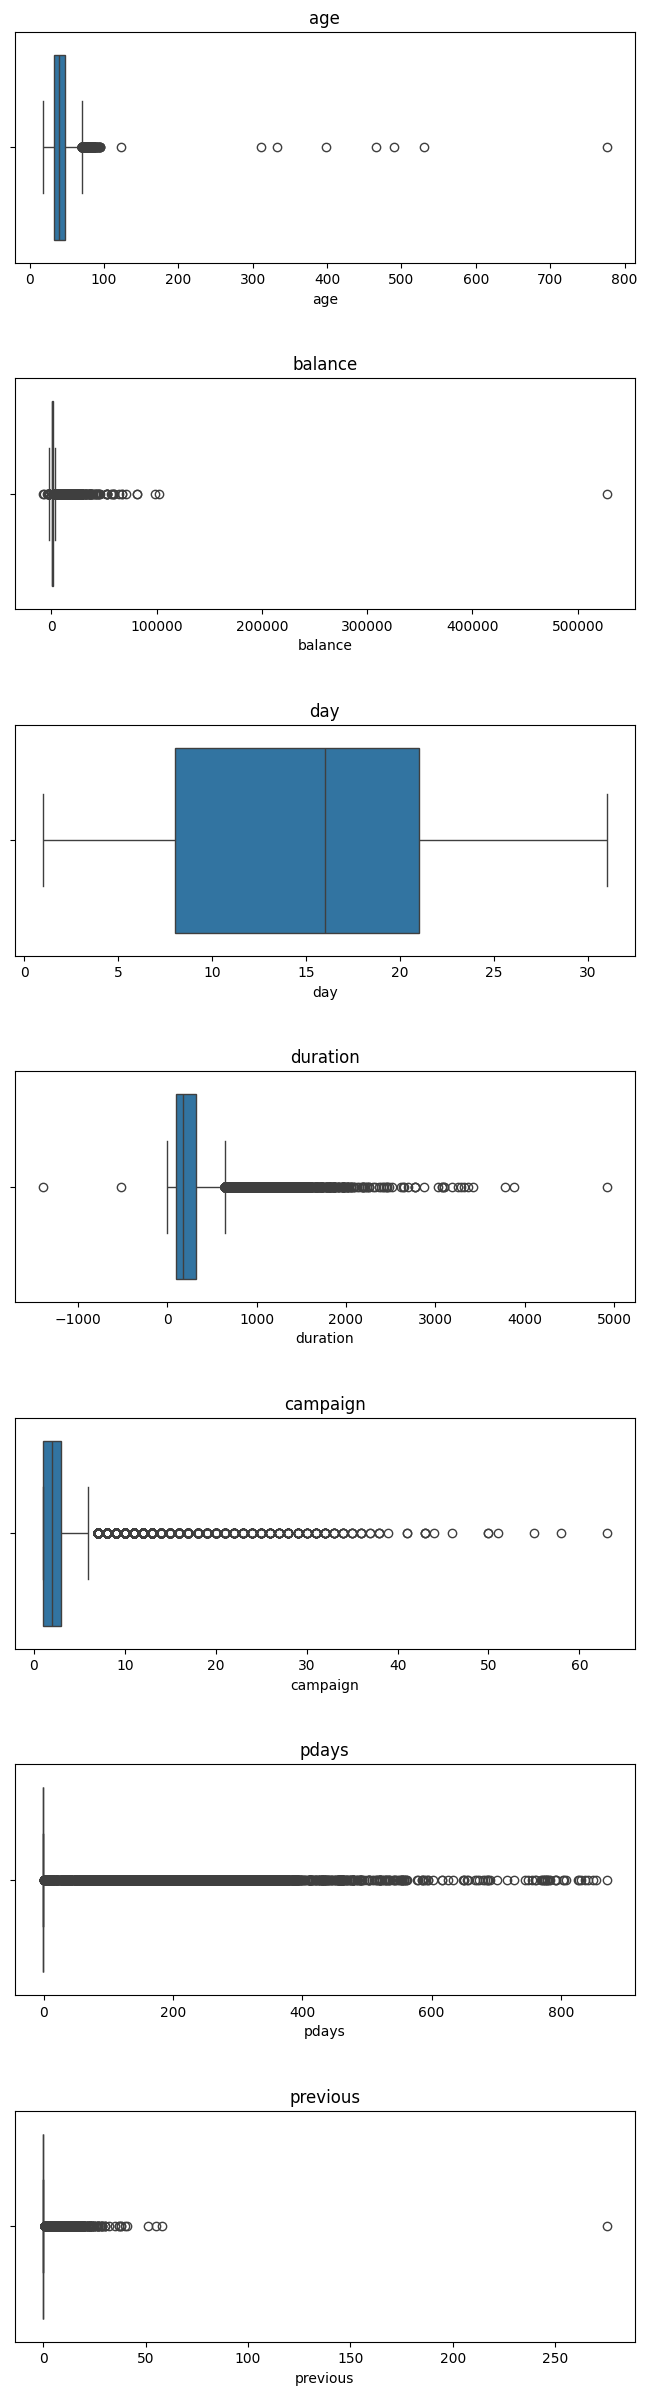

In [8]:
# Outliers en las variables numéricas
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

In [ ]:
# Observaciones:

# "age": hay sujetos con edades mucho mayores a 100 años
# "duration": hay valores negativos
# "previous": hay un valor extremadamente alto (cercano a 300)